In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
def load_metrics(directory):
    all_data = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)
                data['filename'] = filename  # Add the filename to identify each run
                all_data.append(data)
    
    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(all_data)
    
    return df

In [3]:
# directory = './NN/sun_28_07_airport/'
directory = './NN/08_14_crema/'
df = load_metrics(directory)

df

,n,epsilon,clipC,T,Clr,network_width,grad_norms,train_losses,test_losses,test_accuracies,filename
0,60000,2.00,25,400,0.1,500,"[[0.0, 8.611613029297192], [3.84693277528882, ...","[2.3025851249694824, 2.1396600990831853, 1.941...","[0.002136323809623718, 0.0019359229326248169, ...","[48.67, 62.8, 65.87, 72.39, 74.92, 76.49, 69.3...",24.json
1,60000,1.00,25,400,0.1,1000,"[[0.0, 12.25328479809761], [3.701631527439753,...","[2.3025851249694824, 2.1440725744386513, 1.970...","[0.0021410992860794067, 0.001963141393661499, ...","[60.3, 63.39, 65.97, 73.79, 75.53, 77.03, 78.9...",15.json
2,60000,100.00,25,400,0.1,2000,"[[0.0, 17.52023181042671], [0.635183915703992,...","[2.3025851249694824, 2.1422105459888776, 1.999...","[0.0021388094663619996, 0.0019929952144622804,...","[66.28, 72.92, 74.62, 75.61, 76.73, 77.71, 78....",46.json
3,60000,0.01,25,400,0.1,1000,"[[0.0, 12.052452422094346], [506.5425508836403...","[2.3025851249694824, 392.8807303244008, 639.81...","[0.3917660217285156, 0.6350182250976563, 0.921...","[7.95, 10.05, 11.43, 11.52, 9.27, 10.68, 14.73...",5.json
4,60000,1.00,25,400,0.1,50,"[[0.0, 2.631916151237488], [98.35838357608108,...","[2.3025851249694824, 65.92942112110168, 141.54...","[0.06636180229187012, 0.1428126708984375, 0.16...","[8.49, 5.26, 18.16, 9.93, 19.05, 22.67, 16.94,...",11.json
5,60000,2.00,25,400,0.1,20,"[[0.0, 1.7906538281701505], [124.0644414112530...","[2.3025851249694824, 154.4261854798806, 246.79...","[0.1536792510986328, 0.25055716247558596, 0.33...","[9.33, 12.9, 9.92, 12.67, 17.0, 17.44, 17.63, ...",20.json
6,60000,100.00,25,400,0.1,100,"[[0.0, 4.014307440684239], [2.9658260793368023...","[2.3025851249694824, 2.1363777826329073, 1.657...","[0.0021330831050872805, 0.0016464897513389588,...","[42.5, 61.54, 58.01, 33.19, 34.64, 47.26, 42.3...",42.json
7,60000,0.01,25,400,0.1,50,"[[0.0, 2.4483169277052084], [8688.53853631185,...","[2.3025851249694824, 451422.26333701174, 10447...","[448.2571625, 1041.241425, 1523.3780625, 1923....","[15.56, 15.5, 7.67, 12.87, 12.11, 12.8, 10.69,...",1.json
8,60000,4.00,25,400,0.1,10000,"[[0.0, 38.49180974626541], [0.2933186449208607...","[2.3025851249694824, 2.1478705166796845, 2.009...","[0.0021444864988327027, 0.002003405439853668, ...","[68.36, 73.72, 75.38, 77.0, 78.16, 79.05, 79.7...",38.json
9,60000,4.00,25,400,0.1,500,"[[0.0, 8.601451351928711], [2.2037439218223094...","[2.3025851249694824, 2.145149689712127, 1.9724...","[0.0021418923139572142, 0.0019652889013290404,...","[58.19, 69.64, 70.44, 75.4, 76.82, 79.55, 79.6...",34.json


In [4]:
# Run on wed 24 files, notice that the delta is always 1 / 60000

# def update_n_values(df):
#     def determine_n(filename):
#         file_index = int(filename.split('.')[0])
#         if file_index % 3 == 0:
#             return 600
#         elif file_index % 3 == 1:
#             return 6000
#         else:
#             return 60000
    
#     df['n'] = df['filename'].apply(determine_n)
#     return df

# df = update_n_values(df)
# df


In [4]:
def plot_test_accuracies_epochs(df, network_width, clipC_values, T_values):
    unique_n = sorted(df['n'].unique())
    
    for clipC in clipC_values:
        for T in T_values:
            fig, axs = plt.subplots(1, len(unique_n), figsize=(5 * len(unique_n), 5), sharey=True)
            
            for i, n in enumerate(unique_n):
                ax = axs # [i]
                subset = df[(df['clipC'] == clipC) & (df['T'] == T) & (df['n'] == n) & (df['network_width'] == network_width)]
                if not subset.empty:
                    # Create a DataFrame for plotting
                    plot_data = []
                    for index, row in subset.iterrows():
                        for epoch, test_acc in enumerate(row['test_accuracies']):
                            plot_data.append({
                                'epoch': epoch,
                                'test_accuracy': test_acc,
                                'epsilon': row['epsilon']
                            })
                    plot_df = pd.DataFrame(plot_data)
                    sns.lineplot(x='epoch', y='test_accuracy', hue='epsilon', data=plot_df, ax=ax)
                ax.set_title(f'n = {n}')
                ax.set_xlabel('Epoch')
                ax.set_ylabel('Test Accuracy')
            
            fig.suptitle(f'clipC = {clipC}, T = {T}')
            plt.tight_layout()
            plt.show()

In [7]:
clipC_values = [25]
T_values = [400]
network_width = 10000

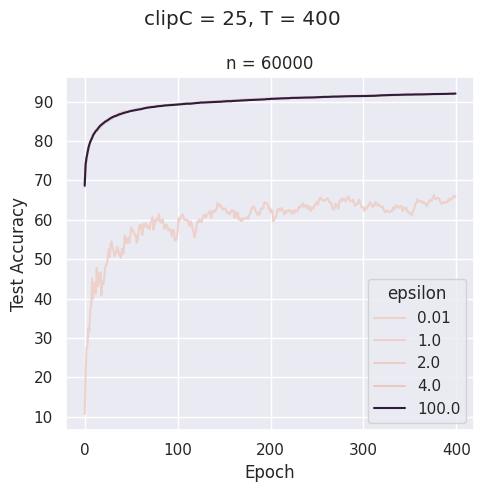

In [8]:
plot_test_accuracies_epochs(df, network_width, clipC_values, T_values)

In [9]:
def plot_test_accuracies_epochs_with_style(df, clipC_values, T_values):
    unique_n = sorted(df['n'].unique())
    
    for clipC in clipC_values:
        for T in T_values:
            fig, axs = plt.subplots(1, len(unique_n), figsize=(5 * len(unique_n), 5), sharey=True)
            
            for i, n in enumerate(unique_n):
                ax = axs # [i]
                subset = df[(df['clipC'] == clipC) & (df['T'] == T) & (df['n'] == n)]
                if not subset.empty:
                    # Create a DataFrame for plotting
                    plot_data = []
                    for index, row in subset.iterrows():
                        for epoch, test_acc in enumerate(row['test_accuracies']):
                            plot_data.append({
                                'epoch': epoch,
                                'test_accuracy': test_acc,
                                'epsilon': row['epsilon'],
                                'network_width': row['network_width']
                            })
                    plot_df = pd.DataFrame(plot_data)
                    sns.lineplot(x='epoch', y='test_accuracy', hue='epsilon', style='network_width', data=plot_df, ax=ax)
                ax.set_title(f'n = {n}')
                ax.set_xlabel('Epoch')
                ax.set_ylabel('Test Accuracy')
            
            fig.suptitle(f'clipC = {clipC}, T = {T}')
            plt.tight_layout()
            plt.show()

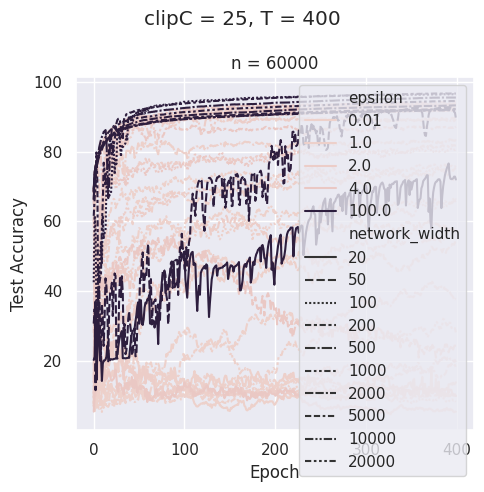

In [10]:
plot_test_accuracies_epochs_with_style(df, clipC_values, T_values)

In [11]:
def plot_final_test_accuracy(df, clipC_values, T_values):
    # Get unique values of 'n'
    unique_n = sorted(df['n'].unique())
    
    for clipC in clipC_values:
        for T in T_values:
            fig, axs = plt.subplots(1, len(unique_n), figsize=(5 * len(unique_n), 5), sharey=True)
            
            for i, n in enumerate(unique_n):
                ax = axs # [i]
                subset = df[(df['clipC'] == clipC) & (df['T'] == T) & (df['n'] == n)].copy()
                if not subset.empty:
                    subset.loc[:, 'final_test_accuracy'] = subset['test_accuracies'].apply(lambda x: x[-1])  # Take the last value in the test_accuracies list
                    sns.lineplot(x='network_width', y='final_test_accuracy', hue='epsilon', data=subset, ax=ax)
                ax.set_title(f'n = {n}')
                ax.set_xlabel('Network Width')
                ax.set_ylabel('Final Test Accuracy')
                ax.set_xscale('log')
            
            fig.suptitle(f'clipC = {clipC}, T = {T}')
            plt.tight_layout()
            plt.show()

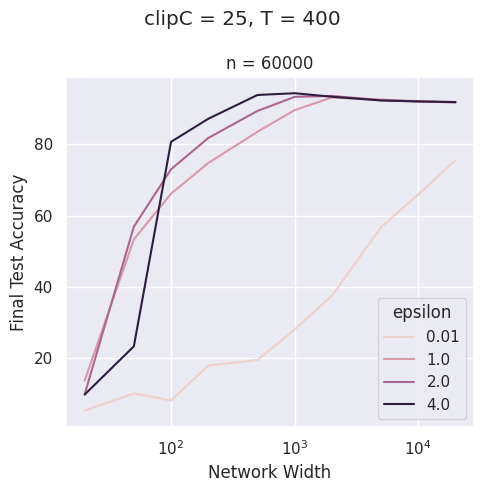

In [12]:
df_filt = df.loc[df['epsilon'] <= 4]


plot_final_test_accuracy(df_filt, clipC_values=clipC_values, T_values=T_values)

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt

In [35]:
# # Convert the lists in the DataFrame to separate rows
# df_expanded_train = df.explode('train_losses')
# df_expanded_train['epoch'] = df_expanded_train.groupby('filename').cumcount() + 1

# df_expanded_test = df.explode('test_losses')
# df_expanded_test['epoch'] = df_expanded_test.groupby('filename').cumcount() + 1

# # Plot train losses over epochs
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=df_expanded_train, x='epoch', y='train_losses', hue='epsilon', palette='tab10')
# plt.title('Train Losses Over Time')
# plt.xlabel('Epoch')
# plt.ylabel('Train Loss')
# plt.legend(title='Epsilon', loc='upper right')
# plt.show()

# # Plot test losses over epochs
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=df_expanded_test, x='epoch', y='test_losses', hue='epsilon', palette='tab10', linestyle='--')
# plt.title('Test Losses Over Time')
# plt.xlabel('Epoch')
# plt.ylabel('Test Loss')
# plt.legend(title='Epsilon', loc='upper right')
# plt.show()

In [38]:
# # Extract final test losses and corresponding widths
# final_test_losses = df[['network_width', 'epsilon', 'test_accuracies']].copy()
# final_test_losses['final_test_accuracy'] = final_test_losses['test_accuracies'].apply(lambda x: x[-1])
# final_test_losses.drop(columns=['test_accuracies'], inplace=True)

# # Plot final test loss against network width
# plt.figure(figsize=(14, 7))
# sns.barplot(data=final_test_losses, x='network_width', y='final_test_accuracy', hue='epsilon', palette='tab10')
# plt.title('Final Test Accuracy vs Network Width')
# plt.xlabel('Network Width')
# plt.ylabel('Final Test Accuracy')
# plt.show()

In [37]:
# df_expanded = df.explode('grad_norms')
# df_expanded['epoch'] = df_expanded.groupby('filename').cumcount() + 1

# # Separate gradient norms for the two layers
# df_expanded['grad_norm_layer1'] = df_expanded['grad_norms'].apply(lambda x: x[0])
# df_expanded['grad_norm_layer2'] = df_expanded['grad_norms'].apply(lambda x: x[1])

# # Set the seaborn style and palette
# sns.set(style='darkgrid')
# new_palette = ['#c44e52', 'black']
# sns.set_palette(new_palette)

# # Create a 2x2 subplot for gradient norms
# fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# # Plot gradient norms for the first layer over epochs
# sns.lineplot(ax=axes[0, 0], data=df_expanded, x='epoch', y='grad_norm_layer1', hue='network_width')
# axes[0, 0].set_title('Gradient Norms for Layer 1 Over Time by Width')
# axes[0, 0].set_xlabel('Epoch')
# axes[0, 0].set_ylabel('Gradient Norm')
# axes[0, 0].legend(title='Width', loc='upper right')

# sns.lineplot(ax=axes[0, 1], data=df_expanded, x='epoch', y='grad_norm_layer1', hue='epsilon')
# axes[0, 1].set_title('Gradient Norms for Layer 1 Over Time by Epsilon')
# axes[0, 1].set_xlabel('Epoch')
# axes[0, 1].set_ylabel('Gradient Norm')
# axes[0, 1].legend(title='Epsilon', loc='upper right')

# # Plot gradient norms for the second layer over epochs
# sns.lineplot(ax=axes[1, 0], data=df_expanded, x='epoch', y='grad_norm_layer2', hue='network_width')
# axes[1, 0].set_title('Gradient Norms for Layer 2 Over Time by Width')
# axes[1, 0].set_xlabel('Epoch')
# axes[1, 0].set_ylabel('Gradient Norm')
# axes[1, 0].legend(title='Width', loc='upper right')

# sns.lineplot(ax=axes[1, 1], data=df_expanded, x='epoch', y='grad_norm_layer2', hue='epsilon')
# axes[1, 1].set_title('Gradient Norms for Layer 2 Over Time by Epsilon')
# axes[1, 1].set_xlabel('Epoch')
# axes[1, 1].set_ylabel('Gradient Norm')
# axes[1, 1].legend(title='Epsilon', loc='upper right')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

In [20]:
# Set the seaborn style and palette
sns.set(style='darkgrid')
# new_palette = ['#c44e52', 'black']
# sns.set_palette(new_palette)

In [4]:
def load_metrics(directory):
    all_data = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)
                data['filename'] = filename  # Add the filename to identify each run
                all_data.append(data)
    
    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(all_data)
    
    return df

In [18]:
# Load data
directory = './NN/trial_monday_22_07_airport/'
df = load_metrics(directory)

# df

In [19]:
# Convert the lists in the DataFrame to separate rows for training losses and test accuracies
df_expanded_train = df.explode('train_losses')
df_expanded_train['epoch'] = df_expanded_train.groupby('filename').cumcount() + 1

df_expanded_test = df.explode('test_accuracies')
df_expanded_test['epoch'] = df_expanded_test.groupby('filename').cumcount() + 1

In [20]:
# df_expanded_train

In [21]:
df_expanded_train = df_expanded_train.loc[df_expanded_train['T'] == 160]
df_expanded_train = df_expanded_train.loc[df_expanded_train['network_width'] == 1000]

df_expanded_test = df_expanded_test.loc[df_expanded_test['T'] == 160]
df_expanded_test = df_expanded_test.loc[df_expanded_test['network_width'] == 1000]

In [22]:
df_expanded_train

,epsilon,clipping_value,T,lr,network_width,grad_norms,train_losses,test_losses,test_accuracies,filename,epoch
1,10,5.0,160,0.2,1000,"[[0.0, 12.14462618581454], [0.7389526059682171...",2.302585,"[0.002174681091308594, 0.002047427797317505, 0...","[65.01, 67.03, 67.68, 68.93, 69.88, 70.61, 71....",22.json,1
1,10,5.0,160,0.2,1000,"[[0.0, 12.14462618581454], [0.7389526059682171...",2.177633,"[0.002174681091308594, 0.002047427797317505, 0...","[65.01, 67.03, 67.68, 68.93, 69.88, 70.61, 71....",22.json,2
1,10,5.0,160,0.2,1000,"[[0.0, 12.14462618581454], [0.7389526059682171...",2.053237,"[0.002174681091308594, 0.002047427797317505, 0...","[65.01, 67.03, 67.68, 68.93, 69.88, 70.61, 71....",22.json,3
1,10,5.0,160,0.2,1000,"[[0.0, 12.14462618581454], [0.7389526059682171...",1.923071,"[0.002174681091308594, 0.002047427797317505, 0...","[65.01, 67.03, 67.68, 68.93, 69.88, 70.61, 71....",22.json,4
1,10,5.0,160,0.2,1000,"[[0.0, 12.14462618581454], [0.7389526059682171...",1.783598,"[0.002174681091308594, 0.002047427797317505, 0...","[65.01, 67.03, 67.68, 68.93, 69.88, 70.61, 71....",22.json,5
...,...,...,...,...,...,...,...,...,...,...,...
30,10,20.0,160,0.5,1000,"[[0.0, 11.987835482382774], [5.549043490469455...",0.242464,"[0.0016674689888954164, 0.0014721351265907289,...","[66.37, 50.18, 34.09, 44.42, 45.9, 72.07, 82.5...",28.json,156
30,10,20.0,160,0.5,1000,"[[0.0, 11.987835482382774], [5.549043490469455...",0.241747,"[0.0016674689888954164, 0.0014721351265907289,...","[66.37, 50.18, 34.09, 44.42, 45.9, 72.07, 82.5...",28.json,157
30,10,20.0,160,0.5,1000,"[[0.0, 11.987835482382774], [5.549043490469455...",0.245339,"[0.0016674689888954164, 0.0014721351265907289,...","[66.37, 50.18, 34.09, 44.42, 45.9, 72.07, 82.5...",28.json,158
30,10,20.0,160,0.5,1000,"[[0.0, 11.987835482382774], [5.549043490469455...",0.245981,"[0.0016674689888954164, 0.0014721351265907289,...","[66.37, 50.18, 34.09, 44.42, 45.9, 72.07, 82.5...",28.json,159


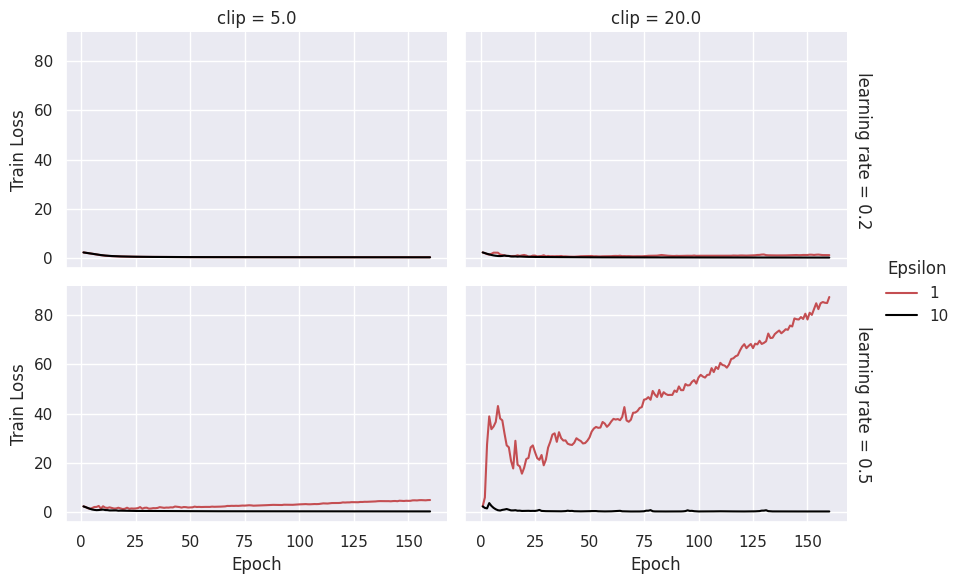

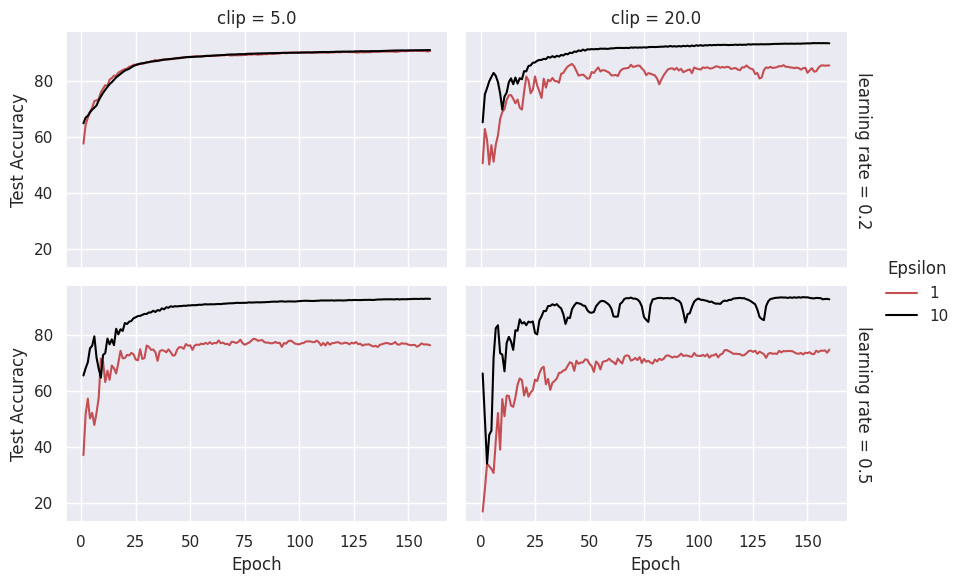

In [23]:
### Plot training losses
g_train = sns.FacetGrid(df_expanded_train, col='clipping_value', row='lr', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_train.map(sns.lineplot, 'epoch', 'train_losses')
g_train.add_legend(title='Epsilon')
g_train.set_axis_labels('Epoch', 'Train Loss')
g_train.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()

# Plot test accuracies
g_test = sns.FacetGrid(df_expanded_test, col='clipping_value', row='lr', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_test.map(sns.lineplot, 'epoch', 'test_accuracies')
g_test.add_legend(title='Epsilon')
g_test.set_axis_labels('Epoch', 'Test Accuracy')
g_test.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()

In [143]:
# import os
# import json

# def add_learning_rate(directory):
#     a = [1e-5, 3e-6, 1e-6]
    
#     for filename in os.listdir(directory):
#         if filename.endswith(".json"):
#             filepath = os.path.join(directory, filename)
#             file_index = int(filename[:-5])
#             lr = a[(file_index // 2) % 3]
            
#             # Load the JSON file
#             with open(filepath, 'r') as f:
#                 data = json.load(f)
            
#             # Add the learning rate
#             data['learning_rate'] = lr
            
#             # Save the updated JSON file
#             with open(filepath, 'w') as f:
#                 json.dump(data, f, indent=4)
            
#             print(f"Updated {filename} with learning rate {lr}")

# # Example usage:
# directory = './NN/trial_wed_1/'
# add_learning_rate(directory)


In [24]:
# Ensure 'learning_rate' is added to your JSON files before running this cell

# Convert the lists in the DataFrame to separate rows for gradient norms
df_expanded_grad = df.explode('grad_norms')
df_expanded_grad['epoch'] = df_expanded_grad.groupby('filename').cumcount() + 1

# Separate gradient norms for the two layers
df_expanded_grad['grad_norm_layer1'] = df_expanded_grad['grad_norms'].apply(lambda x: x[0])
df_expanded_grad['grad_norm_layer2'] = df_expanded_grad['grad_norms'].apply(lambda x: x[1])

# Filter the DataFrame for T = 80 and network_width = 2048
df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['T'] == 100]
df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['network_width'] == 1024]

# Plot gradient norms for the first parameter
g_grad1 = sns.FacetGrid(df_expanded_grad, col='clipping_value', row='lr', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_grad1.map(sns.lineplot, 'epoch', 'grad_norm_layer1')
g_grad1.add_legend(title='Epsilon')
g_grad1.set_axis_labels('Epoch', 'Gradient Norm Layer 1')
g_grad1.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()

# Plot gradient norms for the second parameter
g_grad2 = sns.FacetGrid(df_expanded_grad, col='clipping_value', row='lr', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_grad2.map(sns.lineplot, 'epoch', 'grad_norm_layer2')
g_grad2.add_legend(title='Epsilon')
g_grad2.set_axis_labels('Epoch', 'Gradient Norm Layer 2')
g_grad2.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

In [145]:
# Ensure 'learning_rate' is added to your JSON files before running this cell

# Convert the lists in the DataFrame to separate rows for gradient norms
df_expanded_grad = df.explode('grad_norms')
df_expanded_grad['epoch'] = df_expanded_grad.groupby('filename').cumcount() + 1

# Separate gradient norms for the two layers
df_expanded_grad['grad_norm_layer1'] = df_expanded_grad['grad_norms'].apply(lambda x: x[0])
df_expanded_grad['grad_norm_layer2'] = df_expanded_grad['grad_norms'].apply(lambda x: x[1])

# Filter the DataFrame for T = 80 and network_width = 2048
df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['T'] == 80]
df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['network_width'] == 512]

# Plot gradient norms for the first parameter
g_grad1 = sns.FacetGrid(df_expanded_grad, col='clipping_value', row='learning_rate', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_grad1.map(sns.lineplot, 'epoch', 'grad_norm_layer1')
g_grad1.add_legend(title='Epsilon')
g_grad1.set_axis_labels('Epoch', 'Gradient Norm Layer 1')
g_grad1.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()

# Plot gradient norms for the second parameter
g_grad2 = sns.FacetGrid(df_expanded_grad, col='clipping_value', row='learning_rate', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_grad2.map(sns.lineplot, 'epoch', 'grad_norm_layer2')
g_grad2.add_legend(title='Epsilon')
g_grad2.set_axis_labels('Epoch', 'Gradient Norm Layer 2')
g_grad2.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()


KeyError: 'learning_rate'

We can try smaller values of the clipping constants, and slightly larger learning rates. The number of epochs should be at least 50 I think. Also, let's try smaller values of epsilon, and of course more widths.

These considerations hold for the files in trial_wed_1